In [2]:
import numpy as np
import pandas as pd
import sys
sys.path.append("..")
import analysis as an
from utils import config, io, models
from analysis import select as se
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [22]:
import time

In [3]:
name="USA"
numind=config.NUM_PREDICTORS
indicators=se.selection(name,numind)
predictors=se.indicators(name,numind)

we will use gradient boosting here, first we will distinguish the different variables

In [12]:
gdp=pd.DataFrame(predictors['NY.GDP.MKTP.KD.ZG'])
gdps=gdp['NY.GDP.MKTP.KD.ZG'].shift(periods=-1)
gdps=pd.DataFrame(gdps)
gdps['NY.GDP.MKTP.KD.ZG']=gdps['NY.GDP.MKTP.KD.ZG'].fillna(0)
predictors['NextYearGDP']=gdps

In [13]:
target=['NextYearGDP']
target=target[0]

In [14]:
indicators=pd.DataFrame(indicators)
indexs=indicators.index.values.tolist()


In [15]:
x=predictors[indexs]
y=predictors[target]

gradient boosting

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

gbm_hyperparams = {
    'n_estimators': 100,
    'max_depth': 10,
    'learning_rate': 0.1,
    'loss': 'ls'
}
gbm_model = GradientBoostingRegressor(**gbm_hyperparams)
t0 = time.time()
gbm_model.fit(X_train, y_train)
print(f"Elapsed time training: {time.time() - t0} seconds")
t0 = time.time()
gbm_y_pred = gbm_model.predict(X_test)
print(f"Elapsed time predicting: {time.time() - t0} seconds")


Elapsed time training: 0.10393905639648438 seconds
Elapsed time predicting: 0.0020017623901367188 seconds


In [38]:
print(f"RMSE: {mean_squared_error(y_test, gbm_y_pred)**0.5}")
print(f"R^2: {r2_score(y_test, gbm_y_pred)}")

results_df = X_test.copy()
results_df["y_real"] = y_test
results_df["y_pred"] = gbm_y_pred.astype(float)
results_df["err"] = results_df["y_real"] - results_df["y_pred"]
results_df["%_err"] = results_df["err"] / results_df["y_real"] * 100
results_df

RMSE: 2.4189607188731292
R^2: -0.3471953660638223


IndicatorCode,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.KD.ZG,NE.GDI.FTOT.KD.ZG,NE.GDI.TOTL.KD.ZG,NY.GNP.PCAP.KD.ZG,NY.ADJ.NNTY.PC.KD.ZG,NE.IMP.GNFS.KD.ZG,NY.GNP.MKTP.KD.ZG,NY.ADJ.NNTY.KD.ZG,NE.CON.PRVT.PC.KD.ZG,...,NY.GSR.NFCY.KN,GC.XPN.OTHR.ZS,NE.EXP.GNFS.ZS,GC.BAL.CASH.CN,GC.BAL.CASH.GD.ZS,GC.XPN.TRFT.CN,y_real,y_pred,err,%_err
Year,,,,,,,,,,,,,,,,,,,,,
1982,-1.910891,-2.841549,-5.378274,-10.573420,-2.776621,-1.716713,-1.258672,-1.845341,-0.775281,0.459443,...,7.361090e+10,0.000000,8.466660,0.000000e+00,0.000000,0.000000e+00,4.632457,2.535193,2.097264,45.273261
1962,6.100000,4.480669,7.107750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.154411e+09,0.000000,4.809122,0.000000e+00,0.000000,0.000000e+00,4.400000,-0.398854,4.798854,109.064859
2009,-2.775530,-3.624124,-13.070127,-16.891666,-3.728132,-1.670590,-13.724065,-2.880453,-0.804794,-2.459821,...,1.321251e+11,9.991881,11.011656,-1.483200e+12,-10.286614,2.256700e+12,2.531921,-0.187153,2.719073,107.391735
1986,3.511614,2.559404,3.109025,1.775355,2.341038,2.512638,8.543519,3.291221,3.464414,3.241168,...,3.267140e+10,0.000000,6.993228,0.000000e+00,0.000000,0.000000e+00,3.461748,3.433239,0.028509,0.823533
1993,2.745857,1.399862,5.107956,5.392264,1.389900,0.926932,8.646571,2.735763,2.266649,2.118314,...,4.230630e+10,0.000000,9.519216,0.000000e+00,0.000000,0.000000e+00,4.037643,3.727665,0.309979,7.677223
2004,3.785743,2.829653,5.802831,7.464885,2.976028,2.726661,11.410667,3.933478,3.681792,2.884610,...,9.346190e+10,7.557090,9.625368,-4.758000e+11,-3.876194,1.482000e+12,3.345216,2.806684,0.538532,16.098582
1990,1.919370,0.774516,-0.100088,-1.022436,0.916143,-0.023114,3.577303,2.062606,1.112679,0.915027,...,5.079330e+10,0.000000,9.229297,0.000000e+00,0.000000,0.000000e+00,-0.074085,3.544582,-3.618667,4884.510606
2010,2.531921,1.678272,1.118234,9.549633,2.006141,2.446612,12.715595,2.862543,3.306712,1.074374,...,1.672150e+11,7.884139,12.378301,-1.515900e+12,-10.130061,2.409400e+12,0.000000,2.649517,-2.649517,-inf
1992,3.555396,2.129114,4.143277,5.549072,2.091941,2.361268,7.009813,3.517703,3.790792,2.281500,...,4.175380e+10,0.000000,9.680747,0.000000e+00,0.000000,0.000000e+00,2.745857,3.696542,-0.950685,-34.622531


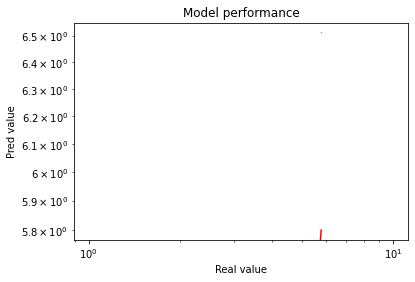

In [37]:
fig, ax = plt.subplots()
plot_range = [results_df["y_real"].min(), results_df["y_real"].max()] 
ax.set_title("Model performance")
ax.set_ylabel("Pred value")
ax.set_xlabel("Real value")
ax.set_yscale("log")
ax.set_xscale("log")
ax.scatter(results_df["y_real"], results_df["y_pred"], s=0.1)
ax.plot(plot_range, plot_range, c="red")
plt.show()

In [39]:
prediction=results_df.at[2010,'y_pred']

In [40]:
prediction

2.6495165988108376

better knowing that its 1.6, its just one point over but its quite good

In [41]:
results_df

IndicatorCode,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.KD.ZG,NE.GDI.FTOT.KD.ZG,NE.GDI.TOTL.KD.ZG,NY.GNP.PCAP.KD.ZG,NY.ADJ.NNTY.PC.KD.ZG,NE.IMP.GNFS.KD.ZG,NY.GNP.MKTP.KD.ZG,NY.ADJ.NNTY.KD.ZG,NE.CON.PRVT.PC.KD.ZG,...,NY.GSR.NFCY.KN,GC.XPN.OTHR.ZS,NE.EXP.GNFS.ZS,GC.BAL.CASH.CN,GC.BAL.CASH.GD.ZS,GC.XPN.TRFT.CN,y_real,y_pred,err,%_err
Year,,,,,,,,,,,,,,,,,,,,,
1982,-1.910891,-2.841549,-5.378274,-10.573420,-2.776621,-1.716713,-1.258672,-1.845341,-0.775281,0.459443,...,7.361090e+10,0.000000,8.466660,0.000000e+00,0.000000,0.000000e+00,4.632457,2.535193,2.097264,45.273261
1962,6.100000,4.480669,7.107750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.154411e+09,0.000000,4.809122,0.000000e+00,0.000000,0.000000e+00,4.400000,-0.398854,4.798854,109.064859
2009,-2.775530,-3.624124,-13.070127,-16.891666,-3.728132,-1.670590,-13.724065,-2.880453,-0.804794,-2.459821,...,1.321251e+11,9.991881,11.011656,-1.483200e+12,-10.286614,2.256700e+12,2.531921,-0.187153,2.719073,107.391735
1986,3.511614,2.559404,3.109025,1.775355,2.341038,2.512638,8.543519,3.291221,3.464414,3.241168,...,3.267140e+10,0.000000,6.993228,0.000000e+00,0.000000,0.000000e+00,3.461748,3.433239,0.028509,0.823533
1993,2.745857,1.399862,5.107956,5.392264,1.389900,0.926932,8.646571,2.735763,2.266649,2.118314,...,4.230630e+10,0.000000,9.519216,0.000000e+00,0.000000,0.000000e+00,4.037643,3.727665,0.309979,7.677223
2004,3.785743,2.829653,5.802831,7.464885,2.976028,2.726661,11.410667,3.933478,3.681792,2.884610,...,9.346190e+10,7.557090,9.625368,-4.758000e+11,-3.876194,1.482000e+12,3.345216,2.806684,0.538532,16.098582
1990,1.919370,0.774516,-0.100088,-1.022436,0.916143,-0.023114,3.577303,2.062606,1.112679,0.915027,...,5.079330e+10,0.000000,9.229297,0.000000e+00,0.000000,0.000000e+00,-0.074085,3.544582,-3.618667,4884.510606
2010,2.531921,1.678272,1.118234,9.549633,2.006141,2.446612,12.715595,2.862543,3.306712,1.074374,...,1.672150e+11,7.884139,12.378301,-1.515900e+12,-10.130061,2.409400e+12,0.000000,2.649517,-2.649517,-inf
1992,3.555396,2.129114,4.143277,5.549072,2.091941,2.361268,7.009813,3.517703,3.790792,2.281500,...,4.175380e+10,0.000000,9.680747,0.000000e+00,0.000000,0.000000e+00,2.745857,3.696542,-0.950685,-34.622531


In [42]:
 predict=gbm_model.predict(x)

In [43]:
predict

array([ 2.30003081,  6.09992988, -0.39885382,  6.51250959,  6.39992191,
        6.49991925,  2.5000255 ,  4.7999644 ,  3.10000956,  3.20681398,
        3.2954811 ,  5.26321488,  5.64306686, -0.51704893, -0.19758139,
        5.38603889,  4.6085669 ,  5.5616291 ,  3.1756983 , -0.24449783,
        2.59449338,  2.86848994,  2.53519275,  7.25898605,  4.23871683,
        3.5116155 ,  3.43323905,  3.62948718,  3.68051874,  3.52717579,
        3.54458223,  3.55539398,  3.69654182,  3.72766453,  2.71899547,
        3.7958692 ,  4.48699921,  4.44988467,  4.68516706,  4.63106632,
        0.97604781,  3.26223216,  2.8067933 ,  3.78573399,  2.80668372,
        2.6666469 ,  1.7786149 ,  2.65136033, -2.77536395, -0.18715286,
        2.6495166 ])